In [1]:
import pandas as pd

# File paths
ev_sales_file = '/content/Ev Sales.xlsx'
charging_stations_file = '/content/ev-charging-stations-india.csv'
state_ev_data_file = '/content/EV_Dataset_state_by_state.csv'

# Loading the datasets
ev_sales = pd.ExcelFile(ev_sales_file)
charging_stations = pd.read_csv(charging_stations_file)
state_ev_data = pd.read_csv(state_ev_data_file)

# Inspecting the sheets in the EV Sales Excel file
ev_sales.sheet_names


['Sheet1']

In [2]:
# Load the sheet from EV Sales
ev_sales_data = ev_sales.parse('Sheet1')

# Displaying the first few rows of each dataset
ev_sales_data.head(), charging_stations.head(), state_ev_data.head()


(        YEAR  2 W   3 W  4 W  BUS  TOTAL
 0 2017-04-01   96  4748  198    0   5042
 1 2017-05-01   91  6720  215    2   7028
 2 2017-06-01  137  7178  149    1   7465
 3 2017-07-01  116  8775  120    0   9011
 4 2017-08-01   99  8905  137    0   9141,
                                                 name          state      city  \
 0                 Neelkanth Star DC Charging Station        Haryana  Gurugram   
 1                       Galleria DC Charging Station        Haryana  Gurugram   
 2  Highway Xpress (Jaipur-Delhi) DC charging station      Rajasthan    Behror   
 3                  Food Carnival DC Charging Station  Uttar Pradesh  Khatauli   
 4                  Food Carnival AC Charging Station  Uttar Pradesh  Khatauli   
 
                                              address lattitude  longitude  \
 0  Neelkanth Star Karnal, NH 44, Gharunda, Kutail...   29.6019    76.9803   
 1  DLF Phase IV, Sector 28, Gurugram, Haryana 122022   28.4673    77.0818   
 2  Jaipur to Delhi

<ipython-input-4-dd395d09d592>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


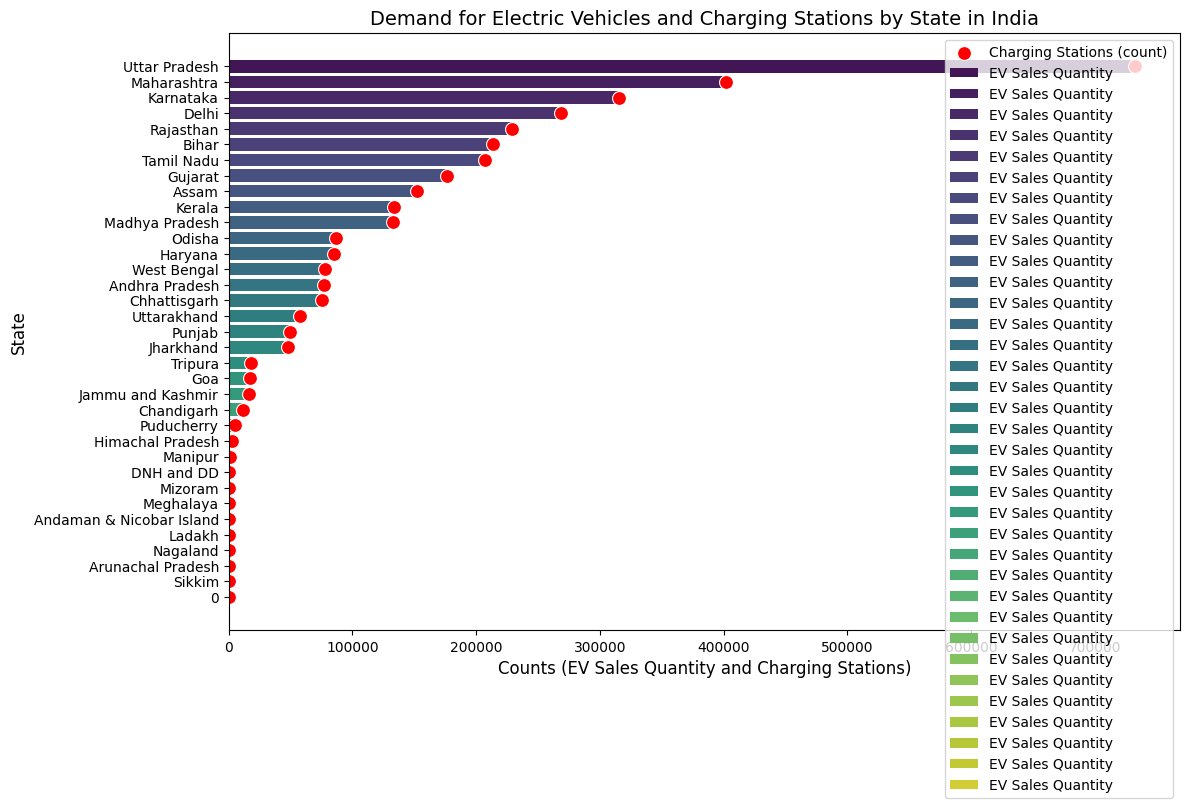

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregating EV sales by state from the state-by-state dataset
state_ev_summary = state_ev_data.groupby('State')['EV_Sales_Quantity'].sum().reset_index()
state_ev_summary = state_ev_summary.sort_values(by='EV_Sales_Quantity', ascending=False)

# Aggregating EV charging station counts by state from the charging stations dataset
charging_stations_summary = charging_stations.groupby('state').size().reset_index(name='Charging_Stations_Count')

# Merging datasets to include both sales and charging stations data
merged_summary['State'] = merged_summary['State'].astype(str)
merged_summary['state'] = merged_summary['state'].astype(str)

# Re-plotting the data
plt.figure(figsize=(12, 8))
sns.barplot(
    x='EV_Sales_Quantity',
    y='State',
    data=merged_summary,
    palette='viridis',
    label="EV Sales Quantity"
)
sns.scatterplot(
    x='EV_Sales_Quantity',
    y='State',
    data=merged_summary,
    color='red',
    label="Charging Stations (count)",
    s=100,
    marker='o'
)

plt.title("Demand for Electric Vehicles and Charging Stations by State in India", fontsize=14)
plt.xlabel("Counts (EV Sales Quantity and Charging Stations)", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-5-4c0ac72a699a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


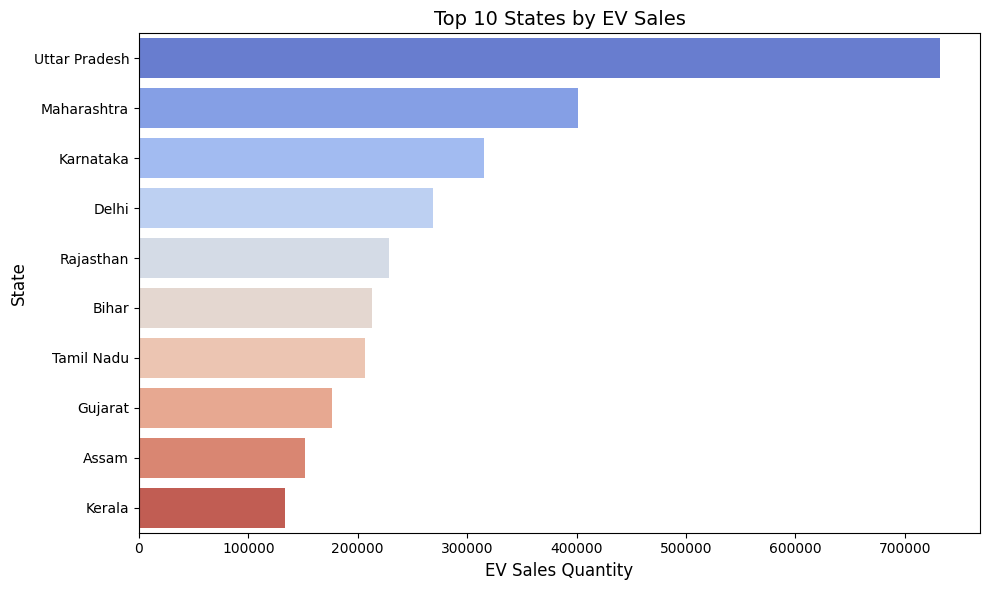

In [5]:
# Top 10 states by EV sales
top_states = state_ev_summary.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='EV_Sales_Quantity',
    y='State',
    data=top_states,
    palette='coolwarm'
)
plt.title("Top 10 States by EV Sales", fontsize=14)
plt.xlabel("EV Sales Quantity", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.tight_layout()
plt.show()


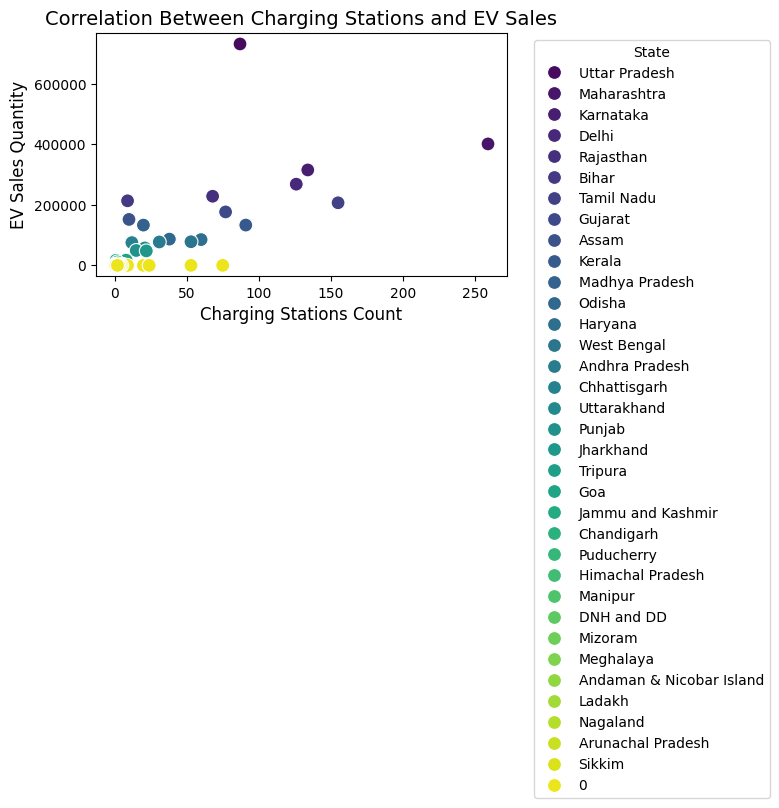

In [6]:
# Scatter plot for correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Charging_Stations_Count',
    y='EV_Sales_Quantity',
    data=merged_summary,
    hue='State',
    palette='viridis',
    s=100
)
plt.title("Correlation Between Charging Stations and EV Sales", fontsize=14)
plt.xlabel("Charging Stations Count", fontsize=12)
plt.ylabel("EV Sales Quantity", fontsize=12)
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


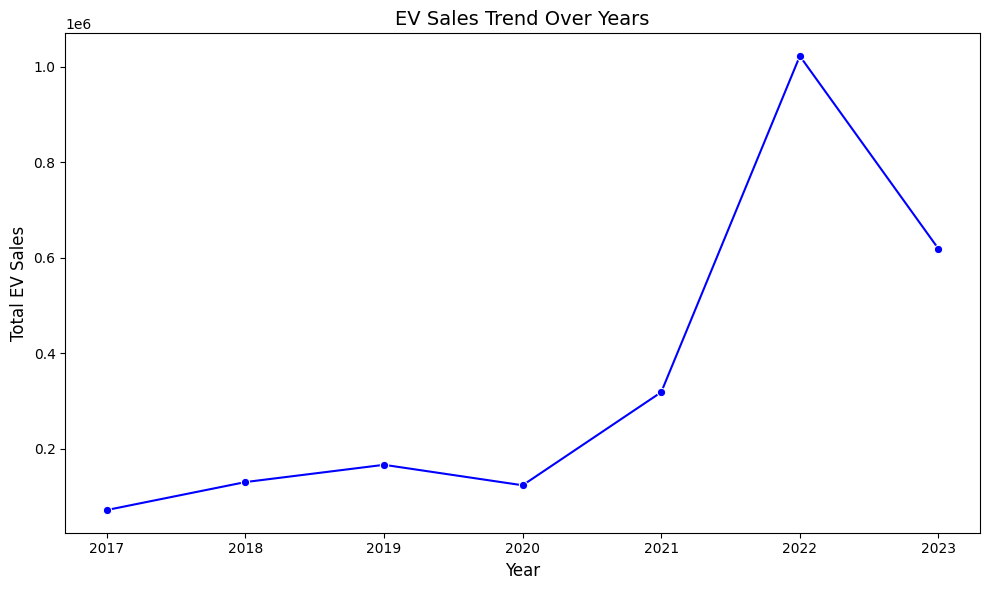

In [7]:
# Extract year-wise trends
ev_sales_data['YEAR'] = pd.to_datetime(ev_sales_data['YEAR'])
ev_sales_trend = ev_sales_data.groupby(ev_sales_data['YEAR'].dt.year)['TOTAL'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(
    x=ev_sales_trend.index,
    y=ev_sales_trend.values,
    marker='o',
    linestyle='-',
    color='blue'
)
plt.title("EV Sales Trend Over Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total EV Sales", fontsize=12)
plt.tight_layout()
plt.show()


<ipython-input-8-26ff7bf73148>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


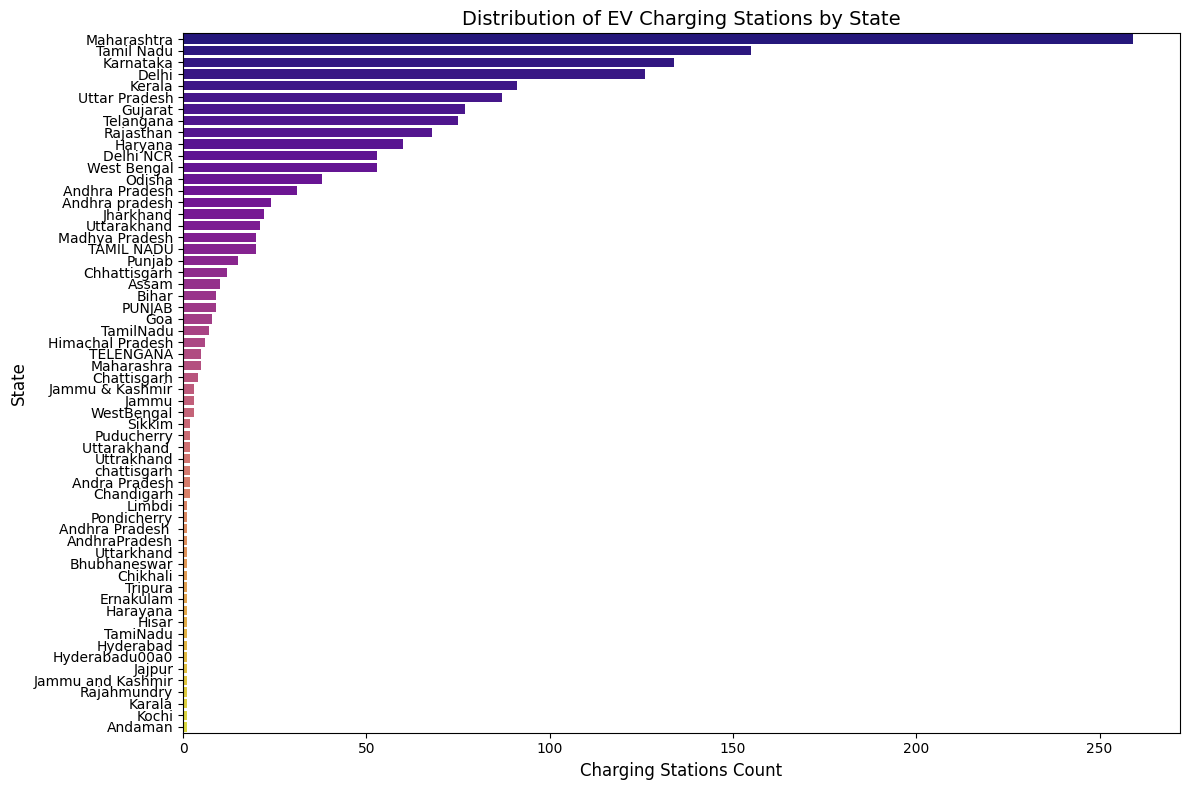

In [8]:
# Distribution of charging stations by state
charging_stations_summary = charging_stations_summary.sort_values(by='Charging_Stations_Count', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(
    x='Charging_Stations_Count',
    y='state',
    data=charging_stations_summary,
    palette='plasma'
)
plt.title("Distribution of EV Charging Stations by State", fontsize=14)
plt.xlabel("Charging Stations Count", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.tight_layout()
plt.show()


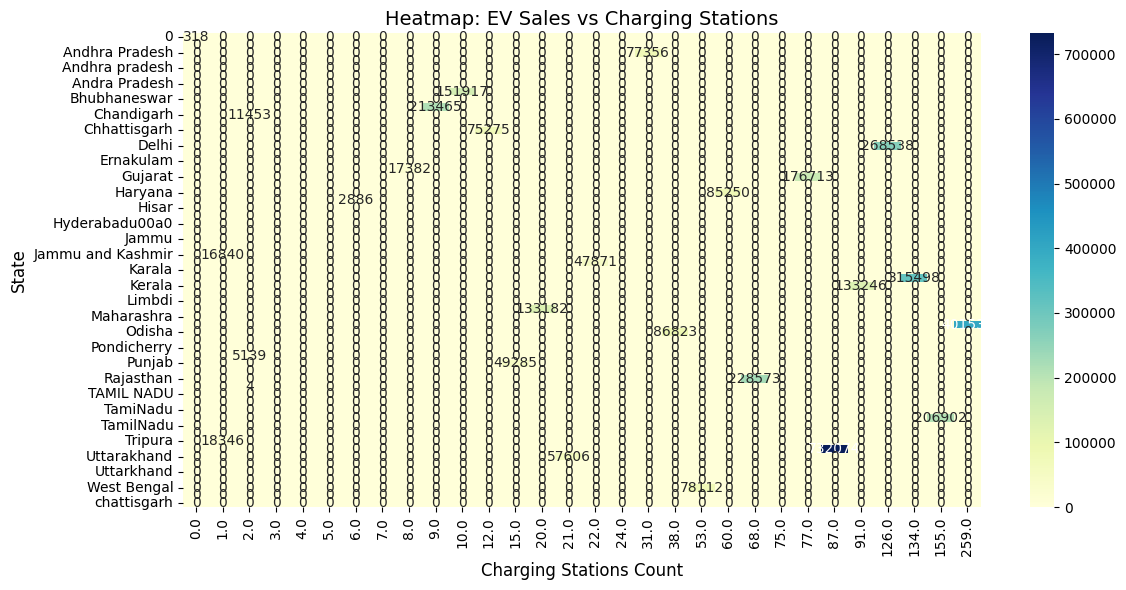

In [9]:
# Heatmap for charging stations and sales
heatmap_data = merged_summary.pivot_table(
    values='EV_Sales_Quantity',
    index='state',
    columns='Charging_Stations_Count',
    fill_value=0
)

plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data,
    cmap='YlGnBu',
    annot=True,
    fmt=".0f"
)
plt.title("Heatmap: EV Sales vs Charging Stations", fontsize=14)
plt.xlabel("Charging Stations Count", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.tight_layout()
plt.show()
